# Real-Time Handwritten Digit Recognition
**Goal:** Train a CNN to recognize handwritten digits and deploy an interactive web app.

#### MNIST Dataset

In [14]:
import tensorflow as tf
import numpy as np

# Load MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(" MNIST Dataset Loaded Successfully!")
print("=" * 50)

# Normalize images (0-1 scaling)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print(f"Train dataset size: {train_images.shape[0]}")
print(f"Test dataset size: {test_images.shape[0]}")

print(f"\n After normalization:")
print(f"Pixel value range: [{train_images.min():.3f}, {train_images.max():.3f}]")

# Dataset statistics
print(f"\n Dataset Statistics:")
print(f"   Training samples: {train_images.shape[0]:,}")
print(f"   Test samples:     {test_images.shape[0]:,}")
print(f"   Image size:       {train_images.shape[1]}x{train_images.shape[2]}")
print(f"   Number of classes: {len(np.unique(train_labels))}")

# Data verification
print(f"\n Data Verification:")
print(f"Any NaN values in train: {np.isnan(train_images).any()}")
print(f"Any NaN values in test: {np.isnan(test_images).any()}")
print(f"Labels in range: [{train_labels.min()}, {train_labels.max()}]")

# Sample visualization info
print(f"\n Sample Preview:")
print(f"First training sample - Label: {train_labels[0]}")
print(f"First test sample - Label: {test_labels[0]}")

 MNIST Dataset Loaded Successfully!
Train dataset size: 60000
Test dataset size: 10000

 After normalization:
Pixel value range: [0.000, 1.000]

 Dataset Statistics:
   Training samples: 60,000
   Test samples:     10,000
   Image size:       28x28
   Number of classes: 10

 Data Verification:
Any NaN values in train: False
Any NaN values in test: False
Labels in range: [0, 9]

 Sample Preview:
First training sample - Label: 5
First test sample - Label: 7


#### Data Augmentation

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(
        factor=0.1,  # ±10% rotation (±36 degrees)
        fill_mode='constant',
        fill_value=0.0,  # Fill with black
        name='random_rotation'
    ),
    keras.layers.RandomZoom(
        height_factor=0.1,  # ±10% zoom
        width_factor=0.1,
        fill_mode='constant',
        fill_value=0.0,
        name='random_zoom'
    ),      
    keras.layers.RandomTranslation(
        height_factor=0.1,  # ±10% vertical translation
        width_factor=0.1,   # ±10% horizontal translation
        fill_mode='constant',
        fill_value=0.0,
        name='random_translation'
    ), 

    keras.layers.RandomContrast(
        factor=0.2,  # Adjust contrast ±20%
        name='random_contrast'
    ),

    keras.layers.RandomBrightness(
        factor=0.1,  # ±10% brightness
        value_range=(0, 1),
        name='random_brightness'
 ),
])

#### Split Dataset

In [16]:


val_split = 0.1
random_seed = 42

val_size = int(val_split * train_images.shape[0])

indices = np.random.permutation(len(train_images))
train_images_shuffled = train_images[indices]
train_labels_shuffled = train_labels[indices]

val_images = train_images[:val_size]
val_labels = train_labels[:val_size]

train_images_final = train_images[val_size:]
train_labels_final = train_labels[val_size:]

print(" Manual Split Results:")
print(f"   Training set: {train_images_final.shape[0]:,} samples")
print(f"   Validation set: {val_images.shape[0]:,} samples")
print(f"   Split ratio: {val_split:.1%}")

 Manual Split Results:
   Training set: 54,000 samples
   Validation set: 6,000 samples
   Split ratio: 10.0%


#### CNN Architecture

In [17]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

print("Model created successfully!")
model.summary()

Model created successfully!


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,250 (6.20 MB)

 Trainable params: 1,626,058 (6.20 MB)

 Non-trainable params: 192 (768.00 B)

#### Define Loss & Optimizer

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Train the Model

In [19]:
history = model.fit(
    train_images_final.reshape(-1,28,28,1), train_labels_final,
    validation_data=(val_images.reshape(-1,28,28,1), val_labels),
    epochs=5,
    batch_size=64,
    verbose=1,
    shuffle=True
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.9284 - loss: 0.2606 - val_accuracy: 0.9788 - val_loss: 0.0786
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.9691 - loss: 0.1081 - val_accuracy: 0.9843 - val_loss: 0.0586
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.9787 - loss: 0.0725 - val_accuracy: 0.9830 - val_loss: 0.0543
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.9807 - loss: 0.0659 - val_accuracy: 0.9827 - val_loss: 0.0638
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.9843 - loss: 0.0521 - val_accuracy: 0.9868 - val_loss: 0.0559


#### Evaluate the Model

In [20]:
test_loss, test_acc = model.evaluate(
    test_images.reshape(-1, 28, 28, 1), 
    test_labels,
    verbose=1  
)

print(f"✅ Model Evaluation Complete:")
print(f"   Test Loss: {test_loss:.4f}")
print(f"   Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9898 - loss: 0.0393
✅ Model Evaluation Complete:
   Test Loss: 0.0393
   Test Accuracy: 98.98%


#### Saving Model

In [21]:
model.save("models/mnist_cnn.h5")

#### Load Model

In [22]:
import tensorflow as tf

# Load model
model = tf.keras.models.load_model("models/mnist_cnn.h5")
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,252 (6.20 MB)

 Trainable params: 1,626,058 (6.20 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

#### Evaluation on Test Set

In [23]:
test_loss, test_acc = model.evaluate(test_images.reshape(-1,28,28,1), test_labels, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 98.98%


#### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


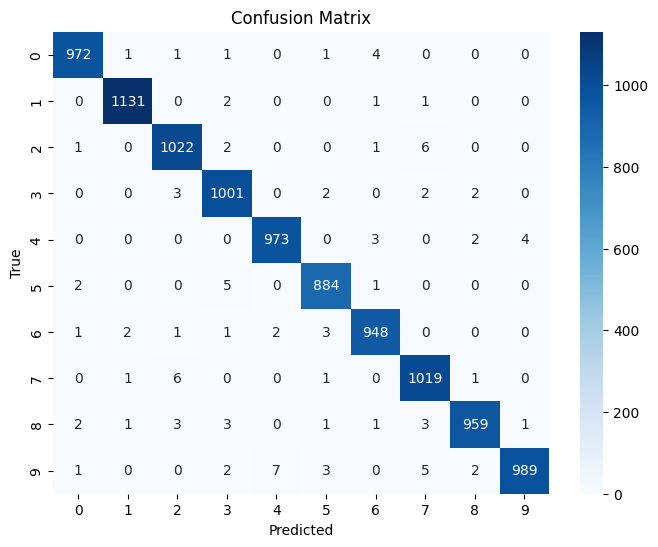

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict labels
pred_probs = model.predict(test_images.reshape(-1,28,28,1))
pred_labels = np.argmax(pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### Accuracy, Precision, Recall, F1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels, average='weighted')
recall = recall_score(test_labels, pred_labels, average='weighted')
f1 = f1_score(test_labels, pred_labels, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 98.98%
Precision: 0.99
Recall: 0.99
F1-score: 0.99


: 